# Read data and quick cleaning & exploration

In [167]:
# import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

In [168]:
# set options on how to display the dataframe
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 200)

In [169]:
# load dataset from google drive
url =   'https://drive.google.com/file/d/1oYQSNxfvw6kFr6-N9rKLRAnLXlp0osEt/view?usp=sharing'  
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
# remove spaces in columns name
df.columns = df.columns.str.replace(' ','')

In [170]:
# drop columns we don't need
df = df.drop(['type', 'id', 'html'], axis=1)

In [171]:
# define song title and artist as index (no feature for model)
df = df.set_index(["name", "artist"])

In [172]:
#View summary of the data
df.info()
# as every row has the same number of non-null entries we assume that the dataset does not contain missing values

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5235 entries, ('Se Eu Quiser Falar Com Deus                                                                                                                                                      ', 'Gilberto Gil                                    ') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel                                   ')
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   key               5235 non-null   int64  
 3   loudness          5235 non-null   float64
 4   mode              5235 non-null   int64  
 5   speechiness       5235 non-null   float64
 6   acousticness      5235 non-null   float64
 7   instru

In [173]:
df.head(20)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,256213,4
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,152267,4
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4
Desafinado,Stan Getz,0.466,0.1460,3,-17.500,1,0.0649,0.931,0.154000,0.107,0.423,142.885,249387,4
Madalena,Maria Gasolina,0.675,0.2070,11,-13.820,0,0.0545,0.963,0.414000,0.112,0.684,93.531,145187,4
O Meu Amor É Glòria,Sílvia Pérez Cruz,0.504,0.7330,7,-10.720,1,0.3890,0.696,0.000056,0.673,0.886,96.565,309760,4
Brigas Nunca Mais,Paula Morelenbaum,0.694,0.5460,10,-11.452,1,0.0400,0.398,0.076000,0.153,0.641,170.032,204027,4


- scale od loudness and duration significantly differ from scale of other features
- mode only contains 0 and 1 
* we have to scale the features

# Dropping unwanted features: 

In [174]:
# drop features on group discussion on which features add useful information to create cluster/playlists mainly based on the mood of the songs. 
df = df.drop(['key', 'duration_ms', 'time_signature'], axis=1)

# Min/Max Scaling: 

In [175]:
# initialize the transformer (optionally, set parameters)
my_min_max = MinMaxScaler(feature_range=(0,1))

In [176]:
# fit the transformer to the data
my_min_max.fit(df)

MinMaxScaler()

In [177]:
# use the transformer to transform the data
scaled_data = my_min_max.transform(df)

In [178]:
# reconvert the transformed data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data,
             index=df.index,
             columns=df.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f02a45ff340>,
      dtype=object)

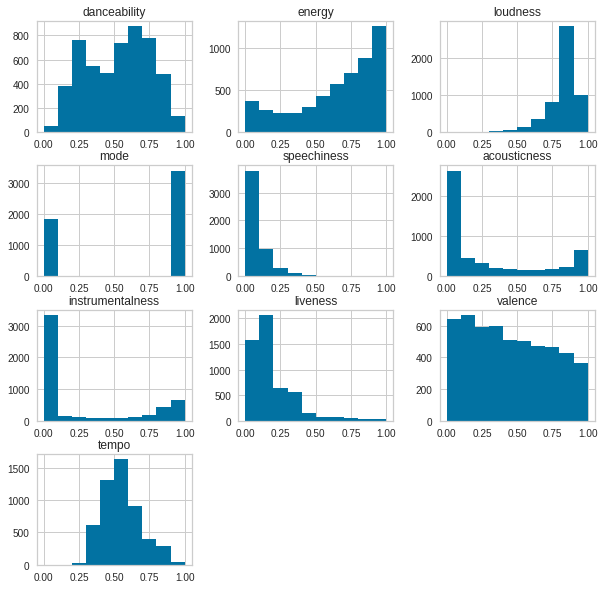

In [179]:
scaled_df.hist(figsize = (10,10))

Are distributions skewed ? 
- mode: only 1 and 0: twice as many songs are written in major
- tempo: skewed right a little, but mainly normally distributed
- spechiness, liveness: skewed to the right; a lot of very low values
- danceability: two peaks / bimodal
- energy: more high values than low values, 
- loudness: strongly skewed left
- valence: A lot of songs with low valence: More negative than positive songs,  linear descending from high values to low values
- acousticness: Bimodal: extreme values on both ends
- instrumentalness: a lot of songs with low values 

- speechiness, acousticness, livennes, instrumentalness, also loudness: most of the songs rate either extremely low, extremely high or both. 


#Finding the best number of K's



## inertia and elbow method: 

In [180]:
# import the model
from sklearn.cluster import KMeans

In [181]:
# inertia and elbow method: 
inertia_list = []
for i in range(1,30):
    mykmeans = KMeans(n_clusters=i)
    mykmeans.fit(scaled_df)
    inertia_list.append(round(mykmeans.inertia_))

In [182]:
#inertia_list

<ipython-input-183-171dbbad1607>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


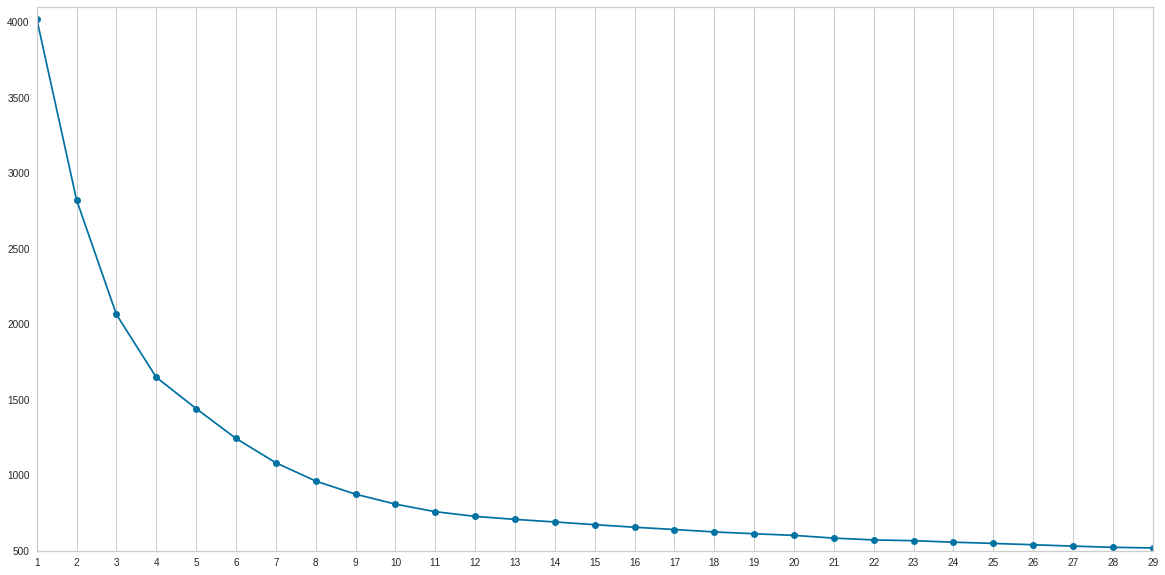

In [183]:
list_30 = list(range(1,30))
plt.figure(figsize=(20, 10))
plt.axis([1, 29, 500, 4100]) # min x, max x, min y, max y
ax = plt.subplot()
ax.set_xticks(list_30)
#ax.set_xticklabels([str(list_30)])
plt.plot(list_30, inertia_list, marker="o")
plt.grid(axis = 'y')

In [184]:
plt.close()

--> Best number clusters from mathematical point of view, using elbow method with inertia: big drop from K=3 to K=4, after K=4 the slope gets lower: **Elbow at K=4** or at **K=6** presumably. 

--> Trade off Business requirements and technical point of view: Reduction of inertia until K = 11 visible. From there on more clusters don't really add any good reduction of the total value of inertia. So building more than four clusters = playlists could be taken into consideration if more than only four playlists have to be generated. 

<ipython-input-185-3d78f5b994ea>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


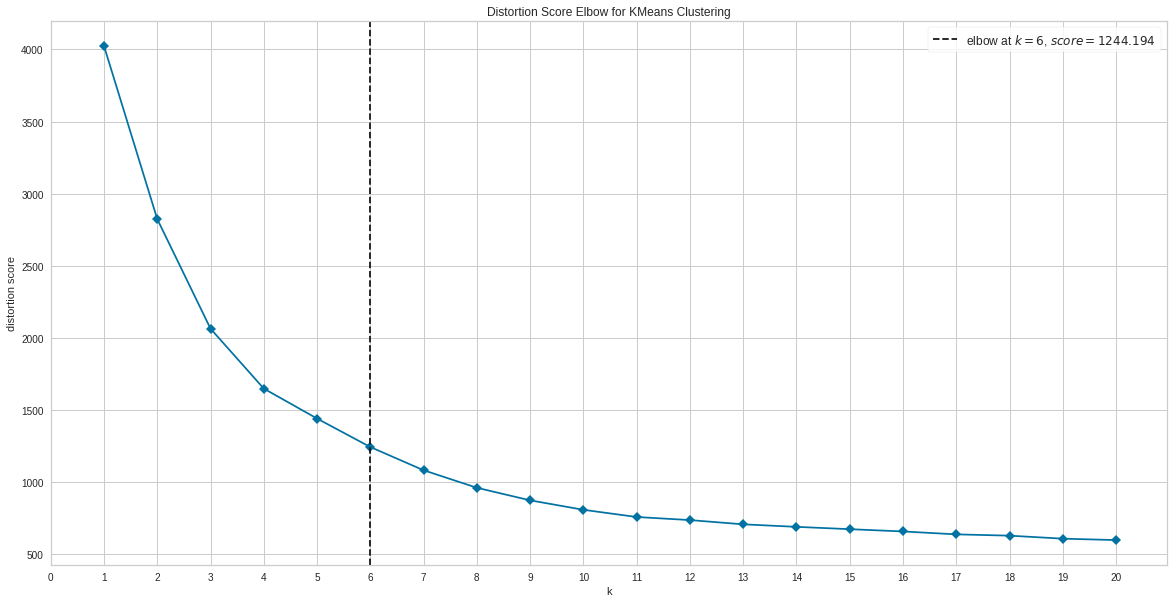

Optimal number of clusters: 6


In [185]:
# with the following code we can determine exactly the elbow of the graph 
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(init='k-means++', random_state=12345), k=(1,21))
visualizer.fit(scaled_df)
# Modifying ticks and ticklabels: 
ax = plt.subplot()
ax.set_xticks(range(21))
ax.set_xticklabels(["0", "1", "2","3","4","5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20"])
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

--> Using a method to calculate the elbow of the graph tells us (“knee point detection algorithm”), that 6 clusters would be the best choice from a mathematical point of view

--> By default, the scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center. This means: We see a drop of the sum of squared ditances the higher then number of K gets, but after n=6 the drop gets smaller and smaller from each cluster to the next one

In [186]:
plt.close()

## Silhouette Score method: 

In [187]:
from sklearn.metrics import silhouette_score
silhouette_list = [] # make an empty list were to put in the values
for i in range(2,10): # iterate over number of clusters
  labels = KMeans(n_clusters=i).fit(scaled_df).labels_ # within each iteration, get the labels/the predicted cluster for each instance
  score = silhouette_score(scaled_df, labels) # get silhouette score for each instance
  silhouette_list.append(score) # append mean score for each number of K to the list 
labels

array([7, 6, 6, ..., 0, 0, 0], dtype=int32)

In [188]:
silhouette_list

[0.3275362627262946,
 0.3640631908823627,
 0.34598764021772194,
 0.35508205154185396,
 0.3710811869031275,
 0.3692368630176748,
 0.34618929158638334,
 0.34510471270348225]

<ipython-input-189-8acc248a4267>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


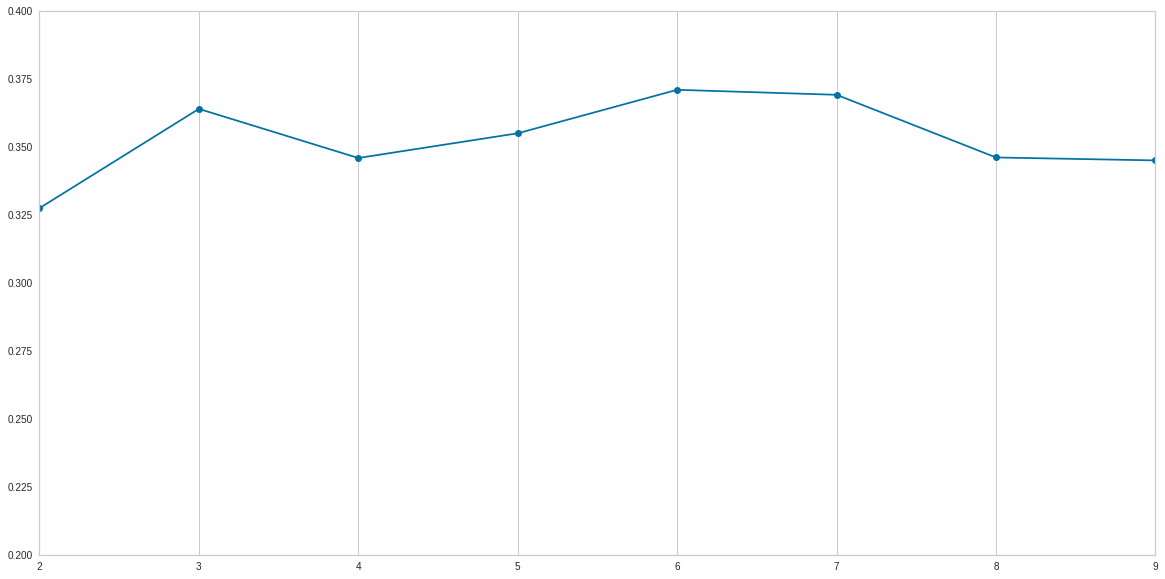

In [189]:
list_2 = list(range(2,10))
plt.figure(figsize=(20, 10))
plt.axis([2, 9, 0.2, 0.4]) # min x, max x, min y, max y
ax = plt.subplot()
ax.set_xticks(list_2)
#ax.set_xticklabels([str(list_30)])
plt.plot(list_2, silhouette_list, marker="o")
plt.grid(axis = 'y')

-->  silhouette score is a metric used to calculate the goodness of a clustering technique. 

--> The silhouette score falls within the range [-1, 1]. A silhouette score of 1 means that the clusters are very dense and nicely separated. Clusters show high intra-cluster cohesion and inter-cluster separation. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect. 

--> so no matter which number of clusters we choose, the shilhouette score never reaches more than 0.35, which also tells us, that we will get clusters that are, if not overlapping, then they are very close and not so good separated

--> As we get the highest score for 6 clusters, this method confirms the results from elbow method. But the differences between 2 and 9 clusters here are rather marginal. 

--> -Trade of Business requirements: Until 9 clusters the mean silhouette score is still justifiable, after that we face a drastic drop, which means that more and more instances lying farer of the other cluster insstances, the cohesiveness reduces. 

In [190]:
plt.close()

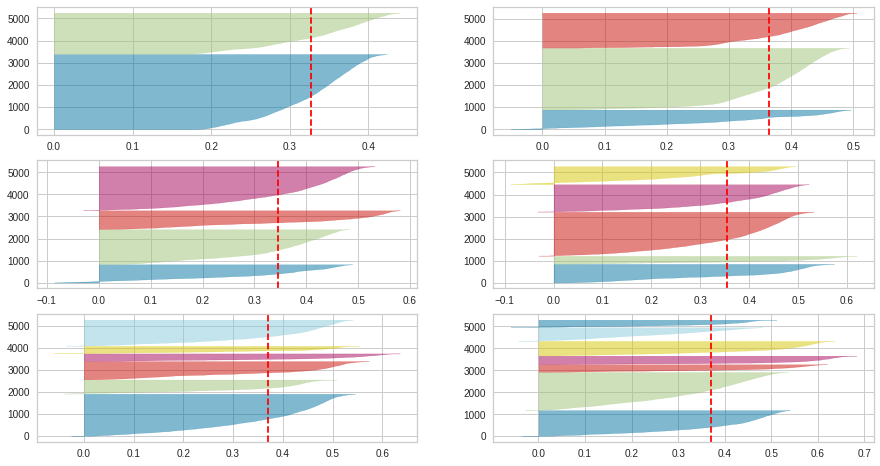

In [191]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in range(2,8):
    mykmeans = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(mykmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_df)

--> The Silhouette Visualizer displays the silhouette coefficient for each sample on a per-cluster basis, visualizing which clusters are dense and which are not. This is particularly useful for determining cluster imbalance, or for selecting a value for by comparing multiple visualizers.

--> In SilhouetteVisualizer plots, clusters with higher scores have wider silhouettes, but clusters that are less cohesive will fall short of the average score across all clusters, which is plotted as a vertical dotted red line.

--> The aspects to look out for in Silhouette plots are cluster scores below the average silhouette score, wide fluctuations in the height of the clusters, and also the size of samples within each cluster

--> for six clusters there are smaller and bigger clusters, the green one is the bigget ans the yellow one is very small, but we also get comparable results for the other number of clusters

--> looking again at the plot for the six clusters we also see that within three of the clusters there are a lot of data instances with indivividual silhouette scores that are a lot smaller than the mean score for all data instances. But again, this holds true if we chose another number of clusters.

--> also some of the clusters reach higher mean scores than other ones, so the purple cluster e.g. seems better separated than others

--> all in all we see that with the features and the data we got, we won't be able to achieve a very convincing result for the clustering of the songs

In [192]:
plt.close()

## Final decision on number of clusters
--> After taking inertia and silhouette score into consideration and confronting it with the business requirement of having not too large playlists we decide to go for **6 clusters**

--> still no optimal solution. This still means to have 5235/5= **more than 872 songs per playlist** if the songs are distributed evenly over the clusters
--> but that is not a problem per sé because it leaves room for selecting songs in each playlist and change the songs of each playlist from time to time. 

--> also more than 6 clusters make it really hard to interpret the findings and make sense out of how the clusters have been built. 


#Apply K-Means: 

In [193]:
# import the model
from sklearn.cluster import KMeans

In [194]:
# initialize the model
my_kmeans = KMeans(n_clusters= 6, n_init=70, max_iter = 500, random_state=12345)

In [195]:
# fit the model to the data
my_kmeans.fit(scaled_df) # pass your scaled data here

KMeans(max_iter=500, n_clusters=6, n_init=70, random_state=12345)

In [196]:
# obtain the cluster output
clusters = my_kmeans.predict(scaled_df) # pass your scaled data here

In [197]:
# attach the cluster output to our original DataFrame
df["cluster"] = clusters

In [198]:
scaled_df['cluster'] = clusters

#Exploratory Analysis with finally chosen **6** clusters:

In [199]:
#df.sample(50).sort_values(by="cluster", ascending=False)

In [200]:
df.groupby("cluster").mean() 

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,,
0,0.330262,0.887161,-7.974658,0.0,0.099167,0.020582,0.739697,0.198279,0.259606,123.340872
1,0.382449,0.163127,-19.886684,0.0,0.046125,0.899003,0.620552,0.144586,0.228834,104.443860
2,0.627859,0.700375,-7.004282,1.0,0.080558,0.219520,0.019481,0.187326,0.608169,121.049708
3,0.372084,0.168771,-19.110813,1.0,0.045648,0.908181,0.529528,0.151435,0.230403,108.403227
4,0.282262,0.909185,-7.841151,1.0,0.109118,0.010821,0.596064,0.202388,0.230943,121.644023
5,0.637621,0.731392,-6.322205,0.0,0.095368,0.172202,0.019444,0.196315,0.553350,121.170201


In [201]:
centroids = my_kmeans.cluster_centers_
centroids = pd.DataFrame(centroids)

centroids

,0,1,2,3,4,5,6,7,8,9
0,0.341532,0.887161,0.848119,-1.110223e-16,0.108025,0.020665,0.750962,0.200890,0.263559,0.576386
1,0.395500,0.163127,0.653929,6.661338e-16,0.050245,0.902613,0.630002,0.146490,0.232319,0.488078
2,0.649285,0.700375,0.863939,1.000000e+00,0.087754,0.220401,0.019777,0.189793,0.617431,0.565679
3,0.384782,0.168771,0.666577,1.000000e+00,0.049725,0.911828,0.537592,0.153430,0.233911,0.506581
4,0.291895,0.909185,0.850296,1.000000e+00,0.118865,0.010865,0.605141,0.205053,0.234459,0.568457
5,0.659380,0.731392,0.875058,5.773160e-15,0.103887,0.172894,0.019740,0.198901,0.561777,0.566242


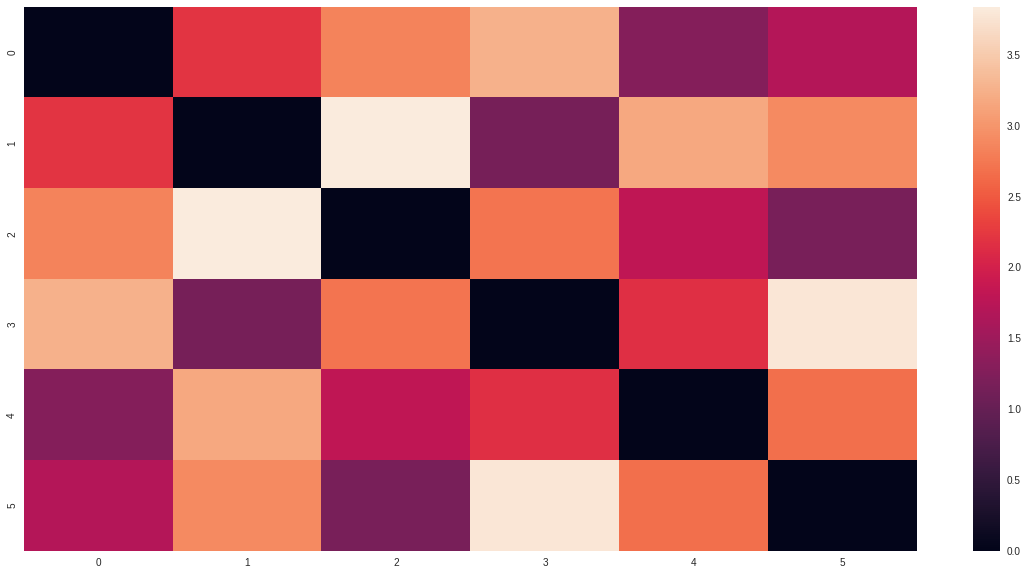

In [202]:
# make a heatmap that shows the mean differences between each cluster 

# define a function for manhatten distance
def manhattan_distance(data, cluster, cluster_to_compare): 
    distance = (
        pd.DataFrame({
            'cluster_1':data.loc[cluster,:],
            'cluster_2':data.loc[cluster_to_compare,:]
        })
        # applying the formula
        .assign(dist_abs = lambda x: abs(x.cluster_1 - x.cluster_2))
        .agg({'dist_abs':'sum'})[0]
    )
    return distance

def euclidean_distance(data, cluster, cluster_to_compare): 
    distance = (
        pd.DataFrame({
            'cluster_1':data.loc[cluster,:],
            'cluster_2':data.loc[cluster_to_compare,:]
        })
        # applying the formula
        .assign(dist_abs = lambda x: (x.cluster_1 - x.cluster_2)**2)
        .agg({'dist_abs':'sum'})[0]**0.5
    )
    return distance


def get_distances(data, distance_type='manhattan'):
    """
    Given a dataframe, return the distance between all the indexes. 
    We assume the indexes represents the centroids for the clusters 
    Args: 
        * dataset 
        * distance type to perform the operation (euclidean or manhattan)
    """
    if distance_type == 'manhattan': 
        distances = [[manhattan_distance(data, cluster, cluster_to_compare) for cluster in data.index] for cluster_to_compare in data.index]
    else: 
        distances = [[euclidean_distance(data, cluster, cluster_to_compare) for cluster in data.index] for cluster_to_compare in data.index]
        
    return pd.DataFrame(distances, columns=data.index, index=data.index)


sns.heatmap(get_distances(centroids))
plt.show()

- clusters most different: (3, 5) and (1,2)

  --> In which features do they differentiate the most. Where are they most similar? 
- 2nd most different: (1, 4) and (0, 3) 

 --> Where biggest differences, where similar? 

- most similar: (0,4),  (1,3) and (3,1) 

  --> On which features do they differentiate the most? 

In [203]:
df.groupby("cluster")['danceability'].count()

cluster
0     336
1     335
2    1919
3     635
4     829
5    1181
Name: danceability, dtype: int64

- Cluster 2 is the biggest one 
- Cluster 0 and 1 include only around 335 songs 
- the biggest cluster is more than five times bigger than the smalles one

In [204]:
# how do clusters differentiate on danceability? 
#df.groupby('cluster')['danceability'].hist(figsize=(20,10), bins=40, histtype='step')
#plt.legend(["0","1", "2", "3", "4", "5"], loc=6)

In [205]:
# how do clusters differentiate on danceability? 
#df.groupby('cluster')['energy'].hist(figsize=(20,10), bins=40, histtype='step')
#plt.legend(["0","1", "2", "3"], loc=6)

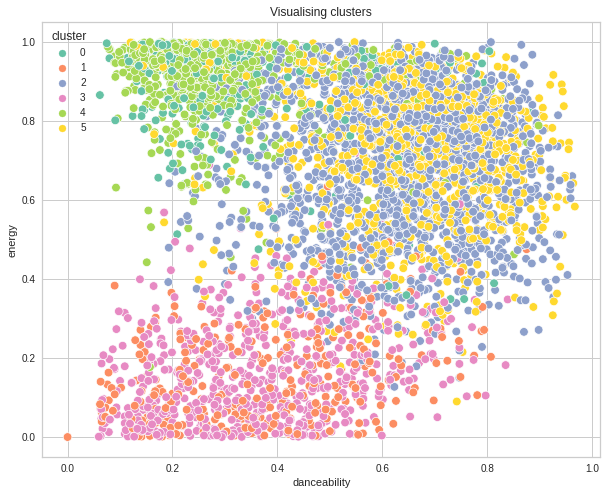

In [206]:
# scatterplot comparing danceability and energy
# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('danceability')
plt.ylabel('energy')

# scatter plot
sns.scatterplot(data= df, x='danceability', y='energy', hue='cluster', palette='Set2', s=75)
#sns.scatterplot(data=cl_pos, x='danceability', y='energy', color='red', s=250)
plt.show()

- we see that choosing two features are not enough to really differentiate the clusters 
- but we can see that we get pairs of clusters that are mostly similar on danceability: (1,3), (2,5) and (4,0)
- whereas (1,3) score from low to middle levels of danceability and low energy
- (2,5) include songs with rather high danceability and high/middle energy
- and clusters 4 and 0 tend to combine low danceability and highly energetic songs



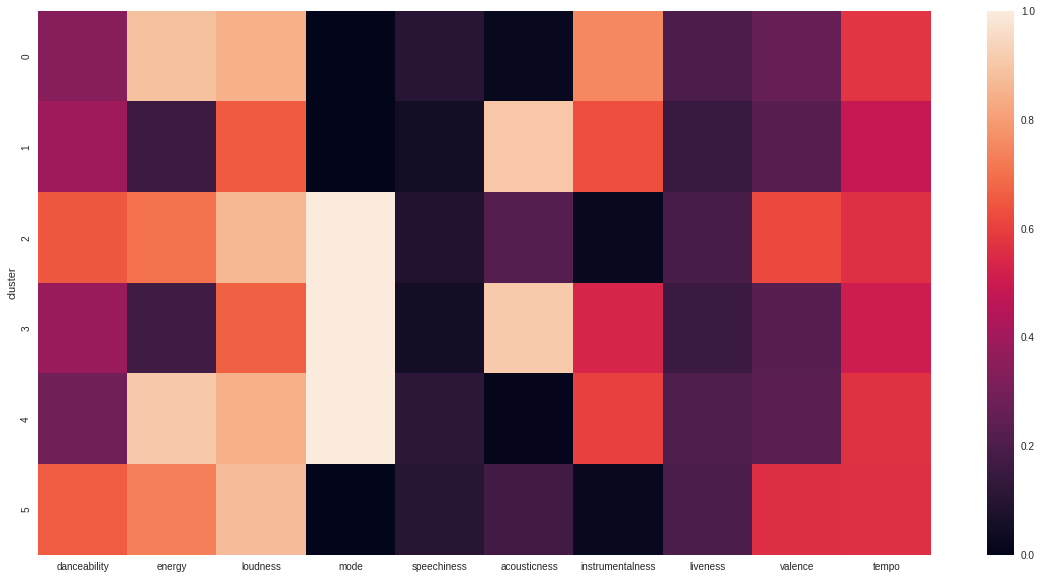

In [207]:
scaled_df.groupby("cluster").mean()
sns.heatmap(scaled_df.groupby("cluster").mean())
plt.show()

In [208]:
df_means = scaled_df.groupby('cluster').mean().reset_index()
df_means

,cluster,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0.341532,0.887161,0.848119,0.0,0.108025,0.020665,0.750962,0.200890,0.263559,0.576386
1,1,0.395500,0.163127,0.653929,0.0,0.050245,0.902613,0.630002,0.146490,0.232319,0.488078
2,2,0.649285,0.700375,0.863939,1.0,0.087754,0.220401,0.019777,0.189793,0.617431,0.565679
3,3,0.384782,0.168771,0.666577,1.0,0.049725,0.911828,0.537592,0.153430,0.233911,0.506581
4,4,0.291895,0.909185,0.850296,1.0,0.118865,0.010865,0.605141,0.205053,0.234459,0.568457
5,5,0.659380,0.731392,0.875058,0.0,0.103887,0.172894,0.019740,0.198901,0.561777,0.566242


<ipython-input-209-e97221263476>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


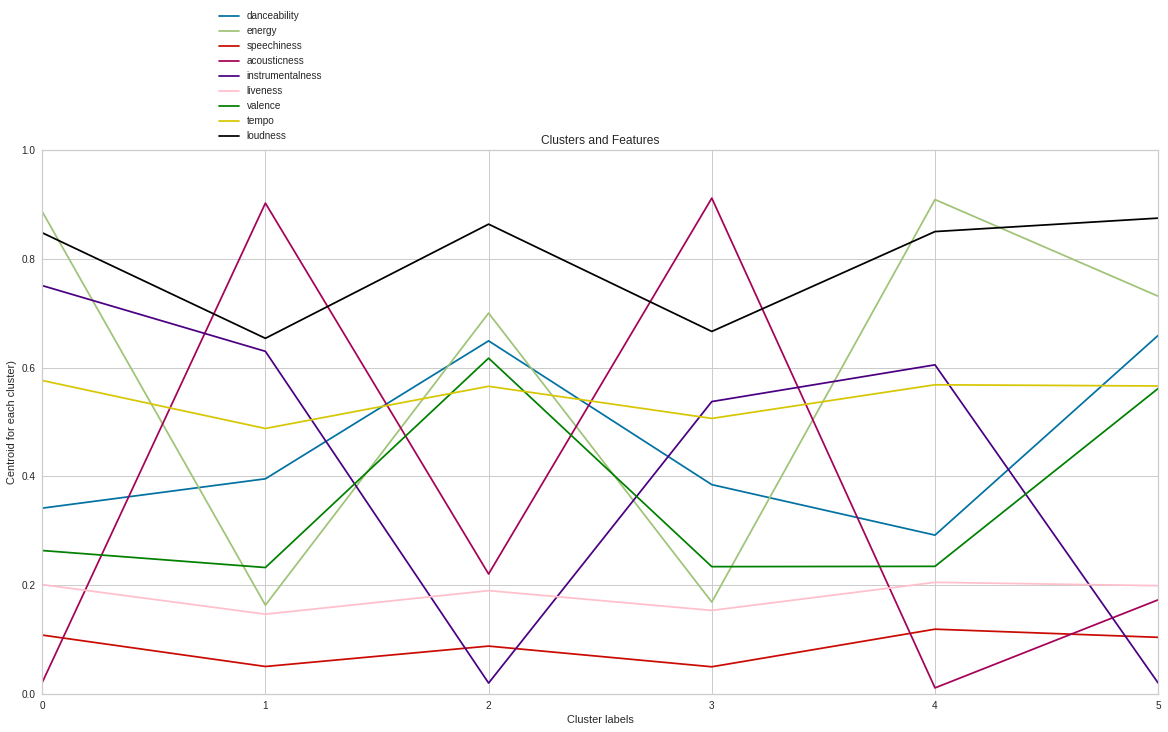

In [209]:
#plotting mean values of all clusters against each other shows which ones vary substantially from one cluster to another.
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(df_means["cluster"], df_means["danceability"], label = "danceability")
plt.plot(df_means["cluster"], df_means["energy"], label = "energy")
plt.plot(df_means["cluster"], df_means["speechiness"], label = "speechiness")
plt.plot(df_means["cluster"], df_means["acousticness"], label = "acousticness")
plt.plot(df_means["cluster"], df_means["instrumentalness"], label = "instrumentalness", color="indigo")
plt.plot(df_means["cluster"], df_means["liveness"], label = "liveness", color="pink")
plt.plot(df_means["cluster"], df_means["valence"], label = "valence", color="green")
plt.plot(df_means["cluster"], df_means["tempo"], label = "tempo", color = 'y')
plt.plot(df_means["cluster"], df_means["loudness"], label = "loudness", color = "black")
plt.legend(bbox_to_anchor =(0.15, 1.00))

ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(["0", "1", "2", "3", "4", "5"])
plt.axis([0, 5, 0, 1])
plt.xlabel('Cluster labels')
plt.ylabel('Centroid for each cluster)')
plt.title('Clusters and Features')
plt.show()

## Further investigate the most similar and most different clusters

**Limitations of looking solely at cluste centroids**
- Comparing the mean value not enough: tempo, liveness and speechiness almost no differences between the cluster centroids. Here we have to furhter look at the distributions
- at this point those three features don't seem to add much to clustering

**Get the pattern of each Cluster:** 

-  Cluster zero: 
                High: loudness, energy, instrumentalness, tempo, liveness, 
                speechiness,
                Low: acousticness, valence, danceability, mode
                --> very similar to cluster 1, only difference in mode
                --> thinking in genres: this more metal like on one more on 
                techno songs? 
- Cluster one: High: acousticness, instrumentalness
               Low: loudness, danceability, valence, energy, speechiness, 
               mode        
- Cluster two: 
                High: energy, loudness, mode, danceability, valence
                Low:  acousticness, instrumentalness 
                --> loud, energetic, positive, danceable, electric
                --> thinking in genres first guess having a look at a sample of 
                the songs: mainly pop songs
- Cluster three: 
                High: acousticness, instrumentalness, mode
                Low: loudness, tempo, valence, energy
                --> rather negative songs with low energy. Many 
                songs are acoustic or instrumental 
                --> thinking in genres: Mainly jazz and or classic? 
                -->  very similar to cluster one, main difference in mode: 
                songs in this cluster written in major

- Cluster four: 
                High: energy, loudness, instrumentalness, mode
                Low: danceability, acousticcness, valence
                --> very similar to cluster zero, only difference is mode, 
                here: major, in cluster zero: minor
                --> thinking in genres: looks like mainly techno or metal?
- Cluster five: 
                High: loudness, energy, danceability, valence
                Low: acousticness, instrumentalness, mode
                --> loud, energetic, positive, danceable, electric, but 
                melancholic
                --> very similar to cluster two, main difference in mode, the 
                songs of this cluster are written in minor
                -->  thinking in genres first guess after having a look at a 
                sample of the songs: Many Ballades of different genres, 
                surprisingly many piano and other instrumental songs (looking 
                at the mean value really is not enough)

--> One conclusion: Mode plays a big role in seperating clusters: We would have gotten completely different clusters if we dropped mode. The question stays relevant if mode plays such a big role for human ears and if the differences between those three clusters that are mainly seperated by mode justify generating different playlists. 

--> Another conclusion: Making playlists that reflect the mood more than genres should contain surprising results regarding genres, and our clustering does. 
So cluster 5 e.g. contains those three songs: 
- Return to Mystery 	Equinox --> some metal genre
- Ride on time   Blackbox --> dance / electronic
- A Milli 	Lil Wayne --> rap

--> All songs are from different genres, but all songs are docking on some agitated mood


**Comparing most different Clusters** 

Comparing Clusters 3 and 5: 
- Both clusters are completely complementary: Whereas Cluster 5 represents all songs that are energetic, loud, danceable and postive, cluster 3 however contains all the songs that are completely the opposite. 
Comparing Clusters 0 and 2: 
- Cluster 1 is the one very similar to cluster 3 and cluster 2 is highly similar to cluster 5
- So, taking the characterizations from above into consideration they differentiate on the exact same features like clusters 3 and 5, they are only are written in different mode

--> mode again plays a (too big) role in separating clusters. 



In [210]:
 #df[df.cluster == 5].sample(50)

,,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
name,artist,,,,,,,,,,,
Fuck Tha Police,N.W.A.,0.859,0.7500,-8.325,0,0.3030,0.019300,0.000000,0.0538,0.857,98.691,5
Stormy Weather,Etta James,0.262,0.3560,-8.031,0,0.0303,0.613000,0.000000,0.1750,0.426,174.176,5
Turn the Music Louder (Rumble) (feat. Tinie Tempah & Katy B) - Radio Edit,KDA,0.766,0.7860,-5.797,0,0.0828,0.073700,0.000000,0.0765,0.667,122.984,5
"Alone, Pt. II",Alan Walker,0.670,0.6680,-4.306,0,0.0422,0.536000,0.000000,0.1330,0.608,88.033,5
The End - Radio Edit,Stefano Noferini,0.769,0.7590,-9.578,0,0.0344,0.000463,0.081900,0.1840,0.393,125.003,5
Hay Algo en Ti,Luny Tunes,0.842,0.6810,-8.149,0,0.0544,0.011500,0.000003,0.1130,0.238,96.017,5
A New Error,Moderat,0.542,0.7300,-9.695,0,0.0409,0.044000,0.000000,0.0549,0.509,111.567,5
Hot Right Now - Radio Edit,DJ Fresh,0.524,0.9720,-1.569,0,0.0431,0.006560,0.000580,0.2240,0.476,175.017,5
Moves Like Jagger - Radio Edit,Maroon 5,0.719,0.7360,-5.534,0,0.0510,0.009020,0.000000,0.2880,0.645,128.034,5


## Visualize results with with flattened dataset via PCA

In [211]:
# import PCA 
from sklearn.decomposition import PCA

In [212]:
# choose two dimensions so we can better visualize the results
pca = PCA(2)

In [213]:
# fit and apply pca
df_pca = pca.fit_transform(df)

In [214]:
df_pca.shape

(5235, 2)

In [215]:
df_pca

array([[ 8.51958676,  3.29042382],
       [-6.1452213 ,  3.64410068],
       [25.07845708,  0.49762433],
       ...,
       [48.74953256, 31.22262697],
       [52.54217987, 17.52802585],
       [55.28706213, 12.51526279]])

In [226]:
# apply kmeans on flattened dataframe
kmeans_pca = KMeans(n_clusters= 6, n_init=70, max_iter = 500, random_state=12345)
cluster = kmeans_pca.fit_predict(df_pca)
cluster

array([0, 5, 3, ..., 4, 4, 4], dtype=int32)

In [227]:
# get centroids
centroids = kmeans_pca.cluster_centers_

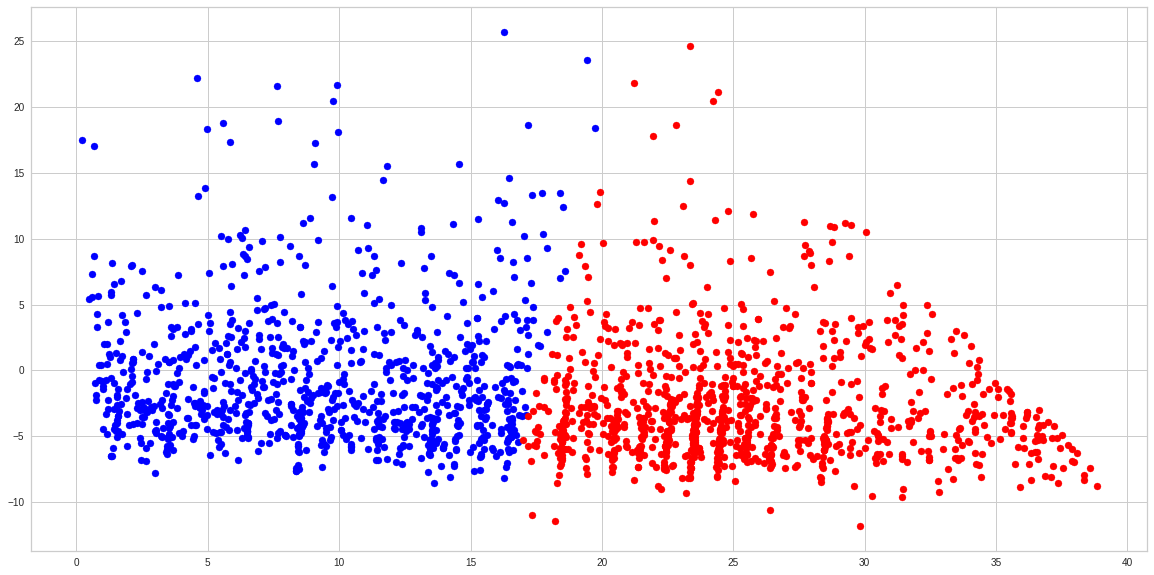

In [228]:
# plot data first with two clusters
filtered_label0 = df_pca[cluster == 0] # filter data points using Boolean indexing with numpy [cluster array has the same lenght as df_pca].
filtered_label3 = df_pca[cluster == 3]
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], color = 'blue') # first define x-value, then y-value
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'red')
plt.show()

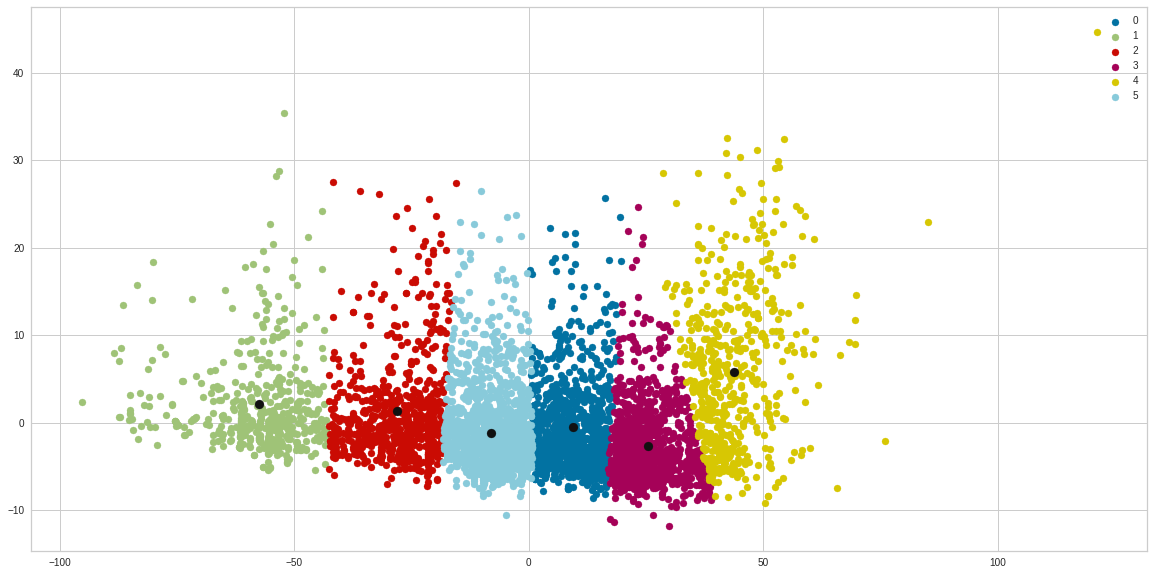

In [229]:
#Getting unique labels
u_labels = np.unique(cluster) # gives us a numpy array of the four clusters we have
#plotting the results:
for i in u_labels: # for every cluster filter make Boolean indexing on dataframe plot it 
  plt.scatter(df_pca[cluster == i , 0] , df_pca[cluster == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k') # add centroids
plt.legend()
plt.show()

- We see that clusters 1 and 4 show the biggest difference. 
